In [1]:
!pip install arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 978.3/978.3 kB 22.0 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import warnings

from arch.univariate.base import DataScaleWarning
from arch.utility.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)
import itertools
import math

In [3]:
tickers=[
    "RELIANCE.NS", "TCS.NS", "INFY.NS", "HDFCBANK.NS", "ICICIBANK.NS", "HINDUNILVR.NS",
    "ITC.NS", "KOTAKBANK.NS", "LT.NS", "SBIN.NS", "AXISBANK.NS", "BAJFINANCE.NS",
    "BHARTIARTL.NS", "ASIANPAINT.NS", "HCLTECH.NS", "MARUTI.NS", "SUNPHARMA.NS", "TITAN.NS",
    "ULTRACEMCO.NS", "WIPRO.NS", "TECHM.NS", "NESTLEIND.NS", "POWERGRID.NS", "NTPC.NS",
    "JSWSTEEL.NS", "TATASTEEL.NS", "BAJAJFINSV.NS", "ADANIENT.NS", "ADANIPORTS.NS", "HINDALCO.NS",
    "ONGC.NS", "COALINDIA.NS", "EICHERMOT.NS", "HDFCLIFE.NS", "SBILIFE.NS", "BRITANNIA.NS",
    "DIVISLAB.NS", "CIPLA.NS", "GRASIM.NS", "BPCL.NS", "IOC.NS", "HEROMOTOCO.NS",
    "BAJAJ-AUTO.NS", "SHREECEM.NS", "DRREDDY.NS", "M&M.NS", "INDUSINDBK.NS", "APOLLOHOSP.NS"
]

In [4]:
from arch import arch_model
from tqdm import tqdm  #progress bar

In [5]:
avg_forecasted_vol=[]

start_date='2022-03-01'
end_date='2024-05-31'

data=yf.download(tickers,start=start_date,end=end_date,interval="1d")
returns=data["Close"].pct_change().dropna()
returns=returns*100

/tmp/ipython-input-871846613.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data=yf.download(tickers,start=start_date,end=end_date,interval="1d")
[*********************100%***********************]  48 of 48 completed


In [6]:
returns

Ticker,ADANIENT.NS,ADANIPORTS.NS,APOLLOHOSP.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJAJFINSV.NS,BAJFINANCE.NS,BHARTIARTL.NS,BPCL.NS,...,SBILIFE.NS,SBIN.NS,SHREECEM.NS,SUNPHARMA.NS,TATASTEEL.NS,TCS.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,WIPRO.NS
Date,,,,,,,,,,,,,,,,,,,,,
2022-03-03,0.121826,-0.506816,1.163288,-5.184968,-1.679440,-2.229916,-2.173422,-1.217881,-0.326291,1.256935,...,-3.554383,-1.444387,-4.619630,0.000000,1.081933,-0.049351,2.316486,-0.709697,-6.542054,2.584641
2022-03-04,-1.752044,-0.926847,-3.468026,-4.657194,-3.070565,-1.668132,-2.361805,-3.118534,-2.730445,0.562922,...,-2.214944,-1.166023,-1.212176,1.065920,-2.010271,-0.565674,1.889049,-5.176263,1.163733,1.009578
2022-03-07,-3.154802,-3.192183,-1.746276,-1.084670,-6.636361,-0.229799,-6.260932,-6.315485,3.319570,-2.971136,...,-2.690679,-4.686655,-2.483332,-0.843738,1.158877,-1.119355,-2.029444,-2.101588,-5.821195,-0.599679
2022-03-08,2.400815,1.630275,1.241345,0.551973,0.426932,2.548973,0.539199,0.601629,1.125256,1.065074,...,0.296421,0.000000,2.698913,3.932418,-1.733887,3.301384,2.657812,-0.772071,2.375351,2.727969
2022-03-09,3.430957,3.665527,-0.239293,5.564723,0.566832,0.660200,3.906383,5.041502,1.244509,0.307382,...,-0.654097,2.589137,-2.741769,1.549701,-1.114603,0.906961,2.927599,2.631516,3.152509,-0.331934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-24,-0.069378,-1.887968,-0.932980,-0.998702,0.750916,-0.170133,-0.419657,0.150157,1.051641,1.027100,...,-0.729200,-0.420621,-0.858567,-0.561838,-0.370366,-1.128818,-1.177584,-1.148600,0.595352,-0.461571
2024-05-27,-2.833126,1.098093,0.421830,-0.085213,1.107325,0.564357,-0.368345,0.857105,-0.298892,0.298129,...,-1.813758,0.615499,-0.162036,-1.388975,0.371743,-0.063640,0.601471,-0.263740,-0.054738,-2.415612
2024-05-28,-1.368172,-2.175816,-0.585914,1.354304,-0.303293,-0.099456,0.241259,-0.325571,-0.960735,-1.455685,...,2.875483,-0.305859,0.863466,-0.078441,-0.341884,-0.185860,-1.097992,0.176292,-0.455711,0.795660


In [7]:
warnings.filterwarnings("ignore")

In [8]:
vol_forecast_dict = {}
avg_forecasted_vol_list=[]
for ticker in tqdm(tickers):
    window_size = 90
    forecast_horizon = 1  #one day ahead
    rolling_volatility = []
    dates = []

    for i in range(window_size, len(returns)):
        train_data = returns[ticker].iloc[i-window_size:i]

        if train_data.isna().any() or train_data.std() < 1e-6:
            continue  # skip bad segments

        model = arch_model(train_data, vol='EGARCH', p=1, q=1, o=1, dist='t')

        try:
            result = model.fit(disp='off', options={"maxiter": 5000},show_warning=False)
            forecast = result.forecast(horizon=forecast_horizon)
            var = forecast.variance.values[-1, 0]

            if not np.isnan(var) and var < 10000:
                vol = np.sqrt(var) /100   # divide because train_data was scaled
                rolling_volatility.append(vol)
                dates.append(returns.index[i])
        except Exception as e:
            continue

    vol_series = pd.Series(rolling_volatility, index=dates)
    vol_forecast_dict[ticker]=vol_series

    avg_forecasted_vol=np.mean(rolling_volatility)
    avg_forecasted_vol_list.append(avg_forecasted_vol)
    print("avg_forecasted_vol of "+str(ticker)+" = "+str(avg_forecasted_vol))


vol_forecast_df = pd.DataFrame(vol_forecast_dict)
avg_forecasted_vol_df=pd.DataFrame(avg_forecasted_vol_list,index=tickers)

  2%|▏         | 1/48 [01:39<1:18:17, 99.94s/it]

avg_forecasted_vol of RELIANCE.NS = 0.05105810843458839


  4%|▍         | 2/48 [02:35<56:43, 73.99s/it]  

avg_forecasted_vol of TCS.NS = 0.02696469146046197


  6%|▋         | 3/48 [03:55<57:26, 76.58s/it]

avg_forecasted_vol of INFY.NS = 0.033561943563576405


  8%|▊         | 4/48 [05:24<59:41, 81.39s/it]

avg_forecasted_vol of HDFCBANK.NS = 0.047803119230251365


 10%|█         | 5/48 [07:12<1:05:16, 91.09s/it]

avg_forecasted_vol of ICICIBANK.NS = 0.05076771265309903


 12%|█▎        | 6/48 [08:36<1:02:10, 88.82s/it]

avg_forecasted_vol of HINDUNILVR.NS = 0.03286776494037657


 15%|█▍        | 7/48 [09:58<59:09, 86.57s/it]  

avg_forecasted_vol of ITC.NS = 0.03559699036393052


 17%|█▋        | 8/48 [11:56<1:04:23, 96.58s/it]

avg_forecasted_vol of KOTAKBANK.NS = 0.06581513483031598


 19%|█▉        | 9/48 [13:35<1:03:15, 97.33s/it]

avg_forecasted_vol of LT.NS = 0.04902966781143823


 21%|██        | 10/48 [14:59<58:55, 93.04s/it] 

avg_forecasted_vol of SBIN.NS = 0.037119658666375184


 23%|██▎       | 11/48 [15:56<50:41, 82.19s/it]

avg_forecasted_vol of AXISBANK.NS = 0.03293991036049303


 25%|██▌       | 12/48 [17:25<50:28, 84.14s/it]

avg_forecasted_vol of BAJFINANCE.NS = 0.04092848509232321


 27%|██▋       | 13/48 [18:43<47:56, 82.19s/it]

avg_forecasted_vol of BHARTIARTL.NS = 0.037722580163663505


 29%|██▉       | 14/48 [20:09<47:18, 83.49s/it]

avg_forecasted_vol of ASIANPAINT.NS = 0.0288764531582183


 31%|███▏      | 15/48 [21:22<44:13, 80.41s/it]

avg_forecasted_vol of HCLTECH.NS = 0.04157352108726521


 33%|███▎      | 16/48 [22:31<41:01, 76.93s/it]

avg_forecasted_vol of MARUTI.NS = 0.03490125604036812


 35%|███▌      | 17/48 [23:06<33:14, 64.33s/it]

avg_forecasted_vol of SUNPHARMA.NS = 0.0220354047423871


 38%|███▊      | 18/48 [24:59<39:21, 78.73s/it]

avg_forecasted_vol of TITAN.NS = 0.049257543329423864


 40%|███▉      | 19/48 [26:24<39:03, 80.81s/it]

avg_forecasted_vol of ULTRACEMCO.NS = 0.042398569006944574


 42%|████▏     | 20/48 [28:08<40:55, 87.71s/it]

avg_forecasted_vol of WIPRO.NS = 0.053739331088953235


 44%|████▍     | 21/48 [29:06<35:26, 78.76s/it]

avg_forecasted_vol of TECHM.NS = 0.04109277005180587


 46%|████▌     | 22/48 [30:40<36:03, 83.22s/it]

avg_forecasted_vol of NESTLEIND.NS = 0.024896578398106908


 48%|████▊     | 23/48 [32:00<34:23, 82.52s/it]

avg_forecasted_vol of POWERGRID.NS = 0.04834917379598138


 50%|█████     | 24/48 [33:43<35:23, 88.49s/it]

avg_forecasted_vol of NTPC.NS = 0.06261247254174516


 52%|█████▏    | 25/48 [35:09<33:37, 87.70s/it]

avg_forecasted_vol of JSWSTEEL.NS = 0.05002219150397933


 54%|█████▍    | 26/48 [36:21<30:25, 82.97s/it]

avg_forecasted_vol of TATASTEEL.NS = 0.04542765718434543


 56%|█████▋    | 27/48 [38:01<30:54, 88.31s/it]

avg_forecasted_vol of BAJAJFINSV.NS = 0.04625662455572264


 58%|█████▊    | 28/48 [39:18<28:13, 84.67s/it]

avg_forecasted_vol of ADANIENT.NS = 0.0887130547785655


 60%|██████    | 29/48 [39:45<21:23, 67.58s/it]

avg_forecasted_vol of ADANIPORTS.NS = 0.03758064611761315


 62%|██████▎   | 30/48 [40:46<19:38, 65.49s/it]

avg_forecasted_vol of HINDALCO.NS = 0.044963687851128906


 65%|██████▍   | 31/48 [42:37<22:28, 79.30s/it]

avg_forecasted_vol of ONGC.NS = 0.040994059056398774


 67%|██████▋   | 32/48 [44:08<22:01, 82.61s/it]

avg_forecasted_vol of COALINDIA.NS = 0.051009997033173576


 69%|██████▉   | 33/48 [45:16<19:34, 78.32s/it]

avg_forecasted_vol of EICHERMOT.NS = 0.05281260646938418


 71%|███████   | 34/48 [46:54<19:37, 84.10s/it]

avg_forecasted_vol of HDFCLIFE.NS = 0.043319318711607935


 73%|███████▎  | 35/48 [48:02<17:12, 79.46s/it]

avg_forecasted_vol of SBILIFE.NS = 0.04020020759887566


 75%|███████▌  | 36/48 [49:12<15:18, 76.54s/it]

avg_forecasted_vol of BRITANNIA.NS = 0.03245552536657815


 77%|███████▋  | 37/48 [50:31<14:09, 77.27s/it]

avg_forecasted_vol of DIVISLAB.NS = 0.0503362012284167


 79%|███████▉  | 38/48 [52:29<14:54, 89.42s/it]

avg_forecasted_vol of CIPLA.NS = 0.051519895864960634


 81%|████████▏ | 39/48 [53:47<12:53, 85.98s/it]

avg_forecasted_vol of GRASIM.NS = 0.029617637040528194


 83%|████████▎ | 40/48 [55:25<11:56, 89.54s/it]

avg_forecasted_vol of BPCL.NS = 0.05494817631411346


 85%|████████▌ | 41/48 [57:02<10:43, 91.91s/it]

avg_forecasted_vol of IOC.NS = 0.046044746734798664


 88%|████████▊ | 42/48 [58:32<09:08, 91.38s/it]

avg_forecasted_vol of HEROMOTOCO.NS = 0.035909446429894624


 90%|████████▉ | 43/48 [1:00:06<07:40, 92.20s/it]

avg_forecasted_vol of BAJAJ-AUTO.NS = 0.03852842484723534


 92%|█████████▏| 44/48 [1:01:04<05:27, 81.79s/it]

avg_forecasted_vol of SHREECEM.NS = 0.03143150807061008


 94%|█████████▍| 45/48 [1:02:08<03:49, 76.60s/it]

avg_forecasted_vol of DRREDDY.NS = 0.027024574215686405


 96%|█████████▌| 46/48 [1:03:47<02:46, 83.37s/it]

avg_forecasted_vol of M&M.NS = 0.04676311266826245


 98%|█████████▊| 47/48 [1:05:06<01:21, 81.86s/it]

avg_forecasted_vol of INDUSINDBK.NS = 0.036504679853606024


100%|██████████| 48/48 [1:06:07<00:00, 82.66s/it]

avg_forecasted_vol of APOLLOHOSP.NS = 0.023649310370200894


In [9]:
##### avg_forecasted_vol_df=avg_forecasted_vol_df.sort_index()
avg_forecasted_vol_df

,0
RELIANCE.NS,0.051058
TCS.NS,0.026965
INFY.NS,0.033562
HDFCBANK.NS,0.047803
ICICIBANK.NS,0.050768
HINDUNILVR.NS,0.032868
ITC.NS,0.035597
KOTAKBANK.NS,0.065815
LT.NS,0.049030
SBIN.NS,0.037120


In [10]:
closing_data=yf.download(tickers,start=start_date,end=end_date,interval="1d")
closing_data=closing_data["Close"]
log_returns=np.log(closing_data/closing_data.shift(1))
expected_returns=log_returns.mean()
expected_returns_df=pd.DataFrame(expected_returns,columns=["expected returns"],index=tickers)
expected_returns
print(tickers)

[*********************100%***********************]  48 of 48 completed


['RELIANCE.NS', 'TCS.NS', 'INFY.NS', 'HDFCBANK.NS', 'ICICIBANK.NS', 'HINDUNILVR.NS', 'ITC.NS', 'KOTAKBANK.NS', 'LT.NS', 'SBIN.NS', 'AXISBANK.NS', 'BAJFINANCE.NS', 'BHARTIARTL.NS', 'ASIANPAINT.NS', 'HCLTECH.NS', 'MARUTI.NS', 'SUNPHARMA.NS', 'TITAN.NS', 'ULTRACEMCO.NS', 'WIPRO.NS', 'TECHM.NS', 'NESTLEIND.NS', 'POWERGRID.NS', 'NTPC.NS', 'JSWSTEEL.NS', 'TATASTEEL.NS', 'BAJAJFINSV.NS', 'ADANIENT.NS', 'ADANIPORTS.NS', 'HINDALCO.NS', 'ONGC.NS', 'COALINDIA.NS', 'EICHERMOT.NS', 'HDFCLIFE.NS', 'SBILIFE.NS', 'BRITANNIA.NS', 'DIVISLAB.NS', 'CIPLA.NS', 'GRASIM.NS', 'BPCL.NS', 'IOC.NS', 'HEROMOTOCO.NS', 'BAJAJ-AUTO.NS', 'SHREECEM.NS', 'DRREDDY.NS', 'M&M.NS', 'INDUSINDBK.NS', 'APOLLOHOSP.NS']


In [11]:
scores=[]
r=0.5 #Risk Aversion Coefficient
i=0
while i<len(expected_returns):
    score=((1-r)*expected_returns.iloc[i])-(r*avg_forecasted_vol_df.iloc[i])
    scores.append(score)
    i+=1
score_df=pd.DataFrame(scores,index=expected_returns.index)
score_df.columns=["Score"]
#sorting the score_df according to the max score and showing the top 2 stocks
score_df.sort_values('Score', inplace=True,ascending=False)
score_df.head(2)

,Score
Ticker,
GRASIM.NS,-0.01063
WIPRO.NS,-0.01203


In [12]:
stock_1=score_df.index[0]
stock_2=score_df.index[1]

In [13]:
stock_1_df=yf.download(stock_1,start="2024-06-01",end="2025-06-01",interval="1d",multi_level_index=False)
stock_2_df=yf.download(stock_2,start="2024-06-01",end="2025-06-01",interval="1d",multi_level_index=False)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [14]:
capital=100000

In [15]:
def df_update(df):
    df.reset_index(inplace=True)
    df.columns = df.columns.get_level_values(0)


    df["EMA_14"]=df["Close"].ewm(span=14,adjust=False).mean()
    df["buy_band"]=df["EMA_14"]+df["High"]-df["Low"]
    df["sell_band"]=df["EMA_14"]-df["High"]+df["Low"]

df_update(stock_1_df)
df_update(stock_2_df)

In [16]:
stock_1_df

,Date,Close,High,Low,Open,Volume,EMA_14,buy_band,sell_band
0,2024-06-03,2351.178955,2387.308085,2344.727307,2382.146815,807692,2351.178955,2393.759732,2308.598178
1,2024-06-04,2239.614990,2347.605697,2155.445995,2318.672635,1543389,2336.303760,2528.463462,2144.144057
2,2024-06-05,2287.704590,2296.538287,2165.917147,2241.599932,1996915,2329.823870,2460.445011,2199.202730
3,2024-06-06,2317.382080,2335.496321,2276.042006,2288.895624,834320,2328.164965,2387.619279,2268.710651
4,2024-06-07,2362.146729,2365.719803,2294.007261,2294.007261,471524,2332.695867,2404.408409,2260.983324
...,...,...,...,...,...,...,...,...,...
242,2025-05-26,2646.771484,2686.825970,2630.530760,2662.813225,435977,2696.342923,2752.638132,2640.047713
243,2025-05-27,2604.724365,2648.764107,2585.594007,2646.372903,874537,2684.127115,2747.297214,2620.957016
244,2025-05-28,2568.257324,2611.300693,2560.784509,2611.300693,849149,2668.677810,2719.193994,2618.161625
245,2025-05-29,2564.271729,2584.497954,2542.949150,2568.257230,616258,2654.756999,2696.305803,2613.208195


In [17]:
def strategy(df):
    signal=[0]
    for i in range(1,len(df)):
        if df.loc[i,"Close"]>df.loc[i,"buy_band"] and df.loc[i-1,"Close"]<=df.loc[i-1,"buy_band"]:
            signal.append(1)
        elif df.loc[i,"Close"]<df.loc[i,"sell_band"] and df.loc[i-1,"Close"]>=df.loc[i-1,"sell_band"]:
            signal.append(-1)
        else:
            signal.append(0)
    df["Signal"]=signal



strategy(stock_1_df)
strategy(stock_2_df)

In [18]:
def backtesting(df,signal,initial_capital):
    trade_idx=[]
    opening_trade_idx=[]
    closing_trade_idx=[]
    entry_date=[]
    exit_date=[]
    pos=[]
    type_of_trade=[]

    prev_pos=0
    current_signal=0
    for i in range(len(df)):
        if df.loc[i,signal]==1 or df.loc[i,signal]==-1:
            trade_idx.append(i)

        current_signal=df.loc[i,signal]

        if current_signal==1:
            if prev_pos==0:
                pos.append(1)
                opening_trade_idx.append(i)
                type_of_trade.append("long")
                entry_date.append(df.loc[i,"Date"])
            elif prev_pos==1:
                pos.append(1)
            elif prev_pos==-1:
                pos.append(0)
                closing_trade_idx.append(i)
                exit_date.append(df.loc[i,"Date"])
        elif current_signal==-1:
            if prev_pos==0:
                pos.append(-1)
                opening_trade_idx.append(i)
                type_of_trade.append("short")
                entry_date.append(df.loc[i,"Date"])
            elif prev_pos==1:
                pos.append(0)
                closing_trade_idx.append(i)
                exit_date.append(df.loc[i,"Date"])
            elif prev_pos==-1:
                pos.append(-1)
        else:
            pos.append(prev_pos)

        prev_pos=pos[i]

    #squaring off all positions at the end
    if pos[len(df)-1]==1:
        pos[len(df)-1]=0
        df.loc[len(df)-1,signal]=-1
        closing_trade_idx.append(len(df)-1)
        exit_date.append(df.loc[len(df)-1,"Date"])
    elif pos[len(df)-1]==-1:
        pos[len(df)-1]=0
        df.loc[len(df)-1,signal]=1
        closing_trade_idx.append(len(df)-1)
        exit_date.append(df.loc[len(df)-1,"Date"])



    no_of_shares=[]
    capital=initial_capital
    portfolio=[]
    shares=0

    for i in range(len(df)):
        price=df.loc[i,"Close"]
        #long trade
        if df.loc[i,signal]==1 and pos[i-1]==0 and capital>price :
            shares=int(capital/price)
            capital-=shares*price
            #trades_idx_1.append(i)
            #type_of_trade1.append("long")
        elif df.loc[i,signal]==-1 and pos[i-1]==1 and shares>0:
            capital+=shares*price
            shares=0
            #trades_idx_1.append(i)
            #type_of_trade1.append("long close")
        #short trade
        elif df.loc[i,signal]==-1 and pos[i-1]==0 and capital>price:
            shares=-int(capital/price)
            capital-=shares*price
            #trades_idx_1.append(i)
            #type_of_trade1.append("short")
        elif df.loc[i,signal]==1 and pos[i-1]==-1 and shares<0:
            capital+=shares*price
            shares=0
            #trades_idx_1.append(i)
            #type_of_trade1.append("short close")
        portfolio_value=shares*price+capital
        portfolio.append(portfolio_value)
        no_of_shares.append(shares)

    #print((opening_trade_idx))
    #print((closing_trade_idx))
    #print(len(type_of_trade))
    #print(pos)
    #print(type_of_trade)
    #print(df.loc[len(df)-1,signal])


    returns=[]
    for i in range(len(opening_trade_idx)):
        if type_of_trade[i]=="long":
            returns.append((df.loc[closing_trade_idx[i],"Close"]-df.loc[opening_trade_idx[i],"Close"])*100/df.loc[opening_trade_idx[i],"Close"])
        else:
            returns.append(-(df.loc[closing_trade_idx[i],"Close"]-df.loc[opening_trade_idx[i],"Close"])*100/df.loc[opening_trade_idx[i],"Close"])



    trade_wise_df=pd.DataFrame({"Entry Index": opening_trade_idx,"Exit Index":closing_trade_idx,"Entry Date":entry_date,"Exit Date":exit_date,"Type of Trade":type_of_trade})
    trade_wise_df["No of stock traded"]=[no_of_shares[i]-no_of_shares[i-1] for i in opening_trade_idx]
    trade_wise_df["Return for trade in %"]=returns
    trade_wise_df["Trade Duration"]=trade_wise_df["Exit Index"]-trade_wise_df["Entry Index"]
    #np.where(df_1["Type of trade"]=='long',(returns,-returns)

    daily_df=pd.DataFrame({"Portfolio Value":portfolio,"No. of Stock":no_of_shares})
    daily_df["Profit from initial Capital"]=(daily_df["Portfolio Value"]-initial_capital)*100/initial_capital
    daily_df["Daily Returns in %"]=(daily_df["Portfolio Value"].pct_change())*100
    return trade_wise_df,daily_df

trade_wise_stock_1,daily_stock_1=backtesting(stock_1_df,"Signal",capital/2)
trade_wise_stock_2,daily_stock_2=backtesting(stock_2_df,"Signal",capital/2)

In [19]:
def plot_buy_sell(df,trade_wise_df):
    import plotly.graph_objects as go

    fig = go.Figure()

    # Line plot for stock price
    fig.add_trace(go.Scatter(
        x=df["Date"],
        y=df["Close"],
        mode='lines',
        name='Close Price',
        line=dict(color='blue')
    ))


    long_trades = trade_wise_df[trade_wise_df["Type of Trade"] == "long"]
    short_trades = trade_wise_df[trade_wise_df["Type of Trade"] == "short"]

    # Long Entry: green triangle-up
    fig.add_trace(go.Scatter(
        x=df.loc[long_trades["Entry Index"], "Date"],
        y=df.loc[long_trades["Entry Index"], "Close"],
        mode='markers',
        marker=dict(symbol='triangle-up', color='green', size=12),
        name='Long Entry'
    ))

    # Short Entry: red triangle-down
    fig.add_trace(go.Scatter(
        x=df.loc[short_trades["Entry Index"], "Date"],
        y=df.loc[short_trades["Entry Index"], "Close"],
        mode='markers',
        marker=dict(symbol='triangle-down', color='red', size=12),
        name='Short Entry'
    ))

    # Long Exit: red triangle-down
    fig.add_trace(go.Scatter(
        x=df.loc[long_trades["Exit Index"], "Date"],
        y=df.loc[long_trades["Exit Index"], "Close"],
        mode='markers',
        marker=dict(symbol='triangle-down', color='red', size=10),
        name='Long Exit'
    ))

    # Short Exit: green triangle-up
    fig.add_trace(go.Scatter(
        x=df.loc[short_trades["Exit Index"], "Date"],
        y=df.loc[short_trades["Exit Index"], "Close"],
        mode='markers',
        marker=dict(symbol='triangle-up', color='green', size=10),
        name='Short Exit'
    ))

    fig.update_layout(title="Trade Entries & Exits on Stock Price")
    fig.show()

def plot_portfolio(df,daily_df):
    fig=px.line(x=df["Date"],y=daily_df["Portfolio Value"])
    fig.show()


In [20]:
plot_buy_sell(stock_1_df,trade_wise_stock_1)

In [21]:
plot_buy_sell(stock_2_df,trade_wise_stock_2)

In [22]:
def benchmark_metrics(df,trade_wise_df,daily_df):
    benchmark_return=((df.loc[len(df)-1,"Close"]-df.loc[0,"Close"])*100)/df.loc[0,"Close"]
    gross_profit=daily_df.loc[len(daily_df)-1,"Profit from initial Capital"]

    total_trades=len(trade_wise_df)
    winning_trades= (trade_wise_df["Return for trade in %"]>0).sum()
    losing_trades=total_trades-winning_trades
    max_holding_time=trade_wise_df["Trade Duration"].max()
    avg_holding_time=trade_wise_df["Trade Duration"].mean()

    #to calculate max drawdown
    drawdown=[]
    for i in range(len(trade_wise_df)):
        entry_idx=trade_wise_df.loc[i,"Entry Index"]
        exit_idx=trade_wise_df.loc[i,"Exit Index"]
        initial_value=daily_df.loc[entry_idx,"Portfolio Value"]

        max_drawdown=0
        temp1=initial_value
        for j in range(entry_idx+1,exit_idx+1):
            temp1=max(temp1,daily_df.loc[j,"Portfolio Value"])
            drawdown_value = (temp1 - daily_df.loc[j,"Portfolio Value"]) / temp1
            max_drawdown=max(max_drawdown,drawdown_value)
        drawdown.append(max_drawdown)

    mean_return=trade_wise_df["Return for trade in %"].mean()
    std_return=trade_wise_df["Return for trade in %"].std()
    rfr=0
    sharpe=(mean_return-rfr)*np.sqrt(252)/std_return

    mean_return_daily=daily_df["Daily Returns in %"].mean()
    std_return_daily=daily_df["Daily Returns in %"].std()
    sharpe_daily=mean_return_daily-rfr*np.sqrt(252)/std_return_daily



    print("Benchmark Return: "+str(benchmark_return)+" %")
    print("Gross Profit: "+str(gross_profit)+" %")
    print("Max Holding Time: "+str(max_holding_time))
    print("Average Holding Time: "+str(avg_holding_time))
    print("Total Trades: "+str(total_trades))
    print("Winning Trades: "+str(winning_trades))
    print("Losing Trades: "+str(losing_trades))
    print("Max Drawdown: "+str(100*max(drawdown))+" %")
    print("Sharpe Ratio: "+str(sharpe))

    final_value=(1+(gross_profit/100))*capital/2
    return (final_value)

In [23]:
final_value_stock_1=benchmark_metrics(stock_1_df,trade_wise_stock_1,daily_stock_1)

Benchmark Return: 7.88513159694132 %
Gross Profit: 8.21572509765625 %
Max Holding Time: 36
Average Holding Time: 22.375
Total Trades: 8
Winning Trades: 4
Losing Trades: 4
Max Drawdown: 7.613650684671707 %
Sharpe Ratio: 2.9914671300054465


In [24]:
final_value_stock_2=benchmark_metrics(stock_2_df,trade_wise_stock_2,daily_stock_2)

Benchmark Return: 14.672886129701302 %
Gross Profit: 14.473869750976563 %
Max Holding Time: 88
Average Holding Time: 33.0
Total Trades: 6
Winning Trades: 3
Losing Trades: 3
Max Drawdown: 11.73416524233112 %
Sharpe Ratio: 4.906069143822186


In [25]:
nifty_50=yf.download(tickers,start="2024-06-01",end="2025-06-01",interval="1d")

[*********************100%***********************]  48 of 48 completed


In [26]:
nifty_50=nifty_50["Close"]

In [27]:
capital=100000
capital_per_stock=capital/48 #out of 50 -2 stocks data could not be retrieved from yfinance
capital_retained=0
for stock in nifty_50:
    shares=capital_per_stock/nifty_50.loc[nifty_50.index[0],stock]
    capital_retained+=shares*nifty_50.loc[nifty_50.index[-1],stock]

R_market=((capital_retained-capital)/capital)*100
print(f"R-Market= {R_market} %")

R-Market= 5.916331109158259 %


In [28]:
R_user=((final_value_stock_1+final_value_stock_2)-capital)*100/capital
print(f"R-User= {R_user} %")

R-User= 11.344797424316406 %


In [29]:
user_score=R_user*100/R_market
print(f"User Score= {user_score} %")

User Score= 191.75393018073453 %


In [30]:
correlations1=log_returns.corrwith(log_returns[stock_1])
correlations2=log_returns.corrwith(log_returns[stock_2])
correlations1.sort_values(inplace=True,ascending=False)
correlations2.sort_values(inplace=True,ascending=False)

hedge_stock1=correlations1.index[1]
hedge_stock2=correlations2.index[1]
print(hedge_stock1)
print(hedge_stock2)

ULTRACEMCO.NS
INFY.NS


In [31]:
correlations1

,0
Ticker,
GRASIM.NS,1.000000
ULTRACEMCO.NS,0.600834
SBIN.NS,0.435832
JSWSTEEL.NS,0.431109
BAJAJFINSV.NS,0.424665
SHREECEM.NS,0.421766
ICICIBANK.NS,0.398815
HINDALCO.NS,0.398059
TITAN.NS,0.387272


In [32]:
stock1 = stock_1
stock2 = stock_2

tickers = [stock1,stock2,hedge_stock1,hedge_stock2]
df = yf.download(tickers,start='2022-03-01',end='2024-05-31')['Close']

#changes

for ticker in tickers:
  stock1_df=yf.download(stock1,start='2022-03-01',end='2024-05-31')
  stock2_df=yf.download(stock2,start='2022-03-01',end='2024-05-31')

[*********************100%***********************]  4 of 4 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [33]:

def df_update(df):
    df.reset_index(inplace=True)
    df.columns = df.columns.get_level_values(0)


    df["EMA_14"]=df["Close"].ewm(span=14,adjust=False).mean()
    df["buy_band"]=df["EMA_14"]+(df["High"]-df["Low"])
    df["sell_band"]=df["EMA_14"]-(df["High"]-df["Low"])

df_update(stock1_df)
df_update(stock2_df)


In [34]:
def strategy(df):
    signal=[0]
    for i in range(1,len(df)):
        if df.loc[i,"Close"]>df.loc[i,"buy_band"] and df.loc[i-1,"Close"]<=df.loc[i-1,"buy_band"]:
            signal.append(1)
        elif df.loc[i,"Close"]<df.loc[i,"sell_band"] and df.loc[i-1,"Close"]>=df.loc[i-1,"sell_band"]:
            signal.append(-1)
        else:
            signal.append(0)
    df["Signal"]=signal

    return signal

stock1_signals=strategy(stock1_df)
stock2_signals=strategy(stock2_df)

In [35]:
def signal_correction(signals):
    #trade_idx=[]
    #opening_trade_idx=[]
    #closing_trade_idx=[]
    #entry_date=[]
    #exit_date=[]
    pos=[]
    #type_of_trade=[]

    prev_pos=0
    current_signal=0
    for i in range(len(signals)):

        current_signal=signals[i]

        if current_signal==1:
            if prev_pos==0:
                pos.append(1)
                #opening_trade_idx.append(i)
                #type_of_trade.append("long")
                #entry_date.append(df.loc[i,"Date"])
            elif prev_pos==1:
                pos.append(1)
                signals[i]=0
            elif prev_pos==-1:
                pos.append(0)
                #closing_trade_idx.append(i)
                #exit_date.append(df.loc[i,"Date"])
        elif current_signal==-1:
            if prev_pos==0:
                pos.append(-1)
                #opening_trade_idx.append(i)
                #type_of_trade.append("short")
                #entry_date.append(df.loc[i,"Date"])
            elif prev_pos==1:
                pos.append(0)
                #closing_trade_idx.append(i)
                #exit_date.append(df.loc[i,"Date"])
            elif prev_pos==-1:
                pos.append(-1)
                signals[i]=0
        else:
            pos.append(prev_pos)

        prev_pos=pos[i]

    #squaring off all positions at the end
    if pos[len(signals)-1]==1:
        pos[len(signals)-1]=0
        signals[len(df)-1]=-1
        #closing_trade_idx.append(len(df)-1)
        #exit_date.append(df.loc[len(df)-1,"Date"])
    elif pos[len(signals)-1]==-1:
        pos[len(signals)-1]=0
        signals[len(df)-1]=1
        #closing_trade_idx.append(len(df)-1)
        #exit_date.append(df.loc[len(df)-1,"Date"])

signal_correction(stock1_signals)
signal_correction(stock2_signals)

In [36]:
def hedged_backtest(stock,hedge_stock,df,stock_signals):
  close= list(df[stock])
  close_hedge = list(df[hedge_stock])
  opening_capital = 500000
  capital = opening_capital
  portfolio_value = [opening_capital]
  entry_price = 0
  entry_price_hedge = 0
  vol = 0
  hedge_vol = 0
  no_of_buy_signals = 0
  no_of_sell_signals = 0
  for i in stock_signals:
    if i == 1:
      no_of_buy_signals+=1
    if i == -1:
      no_of_sell_signals+=1

  long_trade = 0
  short_trade = 0
  for i in range(1,len(stock_signals)):
    if stock_signals[i] == 0:
      if long_trade:
        portfolio_value.append(capital+ vol*(close[i] - entry_price) + hedge_vol*(entry_price_hedge - close_hedge[i]))
      elif short_trade:
        portfolio_value.append(capital- vol*(close[i] - entry_price) - hedge_vol*(entry_price_hedge - close_hedge[i]))
      else:
        portfolio_value.append(capital)
    if stock_signals[i] == -1:
      if long_trade:
        long_trade = 0
        capital+=(vol*(close[i] - entry_price) + hedge_vol*(entry_price_hedge - close_hedge[i]))
        entry_price = 0
        entry_price_hedge = 0
        vol = 0
        hedge_vol = 0
      if no_of_buy_signals > 0:
        entry_price = close[i]
        entry_price_hedge = close_hedge[i]
        vol = int(capital/close[i])
        hedge_vol = int(capital/close_hedge[i])
        short_trade = 1
      no_of_sell_signals-=1
      portfolio_value.append(capital)
    if stock_signals[i] == 1:
      if short_trade:
        short_trade = 0
        capital-=(vol*(close[i] - entry_price) + hedge_vol*(entry_price_hedge - close_hedge[i]))
        entry_price = 0
        entry_price_hedge = 0
        vol = 0
        hedge_vol = 0
      if no_of_sell_signals > 0:
        entry_price = close[i]
        entry_price_hedge = close_hedge[i]
        vol = int(capital/close[i])
        hedge_vol = int(capital/close_hedge[i])
        long_trade = 1
      no_of_buy_signals-=1
      portfolio_value.append(capital)
  return portfolio_value

In [37]:
def backtest(stock,df,stock_signals):
  close= list(df[stock])
  opening_capital = 500000
  capital = opening_capital
  portfolio_value = [opening_capital]
  entry_price = 0
  entry_price_hedge = 0
  vol = 0
  no_of_buy_signals = 0
  no_of_sell_signals = 0
  for i in stock_signals:
    if i == 1:
      no_of_buy_signals+=1
    if i == -1:
      no_of_sell_signals+=1

  long_trade = 0
  short_trade = 0
  for i in range(1,len(stock_signals)):
    if stock_signals[i] == 0:
      if long_trade:
        portfolio_value.append(capital+ vol*(close[i] - entry_price))
      elif short_trade:
        portfolio_value.append(capital- vol*(close[i] - entry_price) )
      else:
        portfolio_value.append(capital)
    if stock_signals[i] == -1:
      if long_trade:
        long_trade = 0
        capital+=(vol*(close[i] - entry_price))
        entry_price = 0
        entry_price_hedge = 0
        vol = 0
        hedge_vol = 0
      if no_of_buy_signals > 0:
        entry_price = close[i]
        vol = int(capital/close[i])
        short_trade = 1
      no_of_sell_signals-=1
      portfolio_value.append(capital)
    if stock_signals[i] == 1:
      if short_trade:
        short_trade = 0
        capital-=(vol*(close[i] - entry_price))
        entry_price = 0
        entry_price_hedge = 0
        vol = 0
        hedge_vol = 0
      if no_of_sell_signals > 0:
        entry_price = close[i]
        vol = int(capital/close[i])
        long_trade = 1
      no_of_buy_signals-=1
      portfolio_value.append(capital)
  return portfolio_value

In [38]:
def sharpe_ratio(return_series, N, rf):
    mean = return_series.mean() * N -rf
    sigma = return_series.std() * np.sqrt(N)
    return mean / sigma

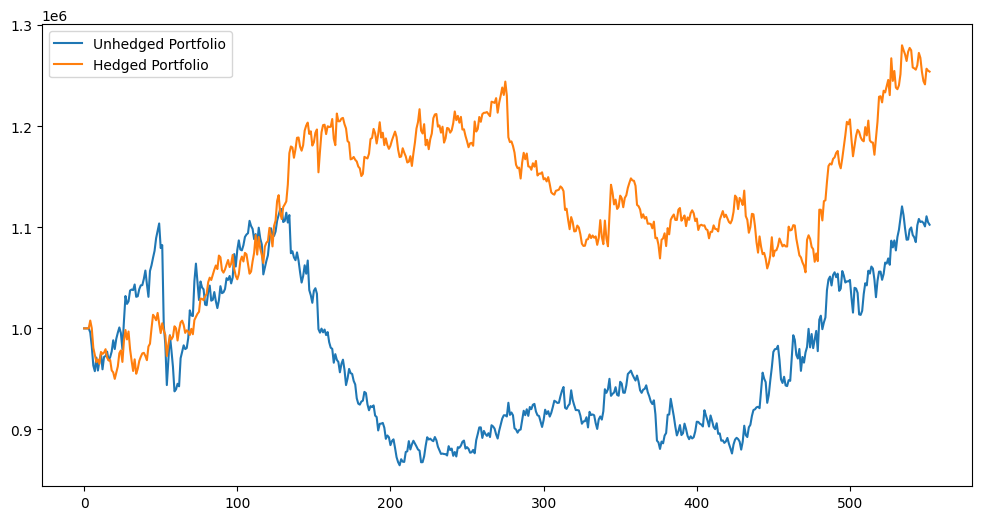

******BACKTEST METRICS******
Hedged Portfolio Returns: 25.40049437561035%
Unhedged Portfolio Returns: 10.255098687744141%
Hedged Portfolio Sharpe Ratio: 0.804833616263056
Unhedged Portfolio Sharpe Ratio: 0.35532496744015146


In [39]:
stock1_portfolio = backtest(stock1,df,stock1_signals)
hedged_stock1_portfolio = hedged_backtest(stock1,hedge_stock1,df,stock1_signals)
stock2_portfolio = backtest(stock2,df,stock2_signals)
hedged_stock2_portfolio = hedged_backtest(stock2,hedge_stock2,df,stock2_signals)
final_portfolio = []
final_hedged_portfolio = []
for i in range(len(stock1_portfolio)):
  final_portfolio.append(stock1_portfolio[i] + stock2_portfolio[i])
  final_hedged_portfolio.append(hedged_stock1_portfolio[i] + hedged_stock2_portfolio[i])

plt.figure(figsize=(12,6))
plt.plot(final_portfolio,label='Unhedged Portfolio')
plt.plot(final_hedged_portfolio,label='Hedged Portfolio')
plt.legend()
plt.show()

print('******BACKTEST METRICS******')
print(f'Hedged Portfolio Returns: {(final_hedged_portfolio[-1] - final_hedged_portfolio[0])*100/final_hedged_portfolio[0]}%')
print(f'Unhedged Portfolio Returns: {(final_portfolio[-1] - final_portfolio[0])*100/final_portfolio[0]}%')
print(f'Hedged Portfolio Sharpe Ratio: {sharpe_ratio(pd.Series(final_hedged_portfolio).pct_change().dropna(),255,0)}')
print(f'Unhedged Portfolio Sharpe Ratio: {sharpe_ratio(pd.Series(final_portfolio).pct_change().dropna(),255,0)}')